In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
assets = pd.read_csv("https://storage.googleapis.com/m6-bucket-webapp-public/M6_Universe.csv")
display(assets.head())

df = yf.download(list(assets['symbol'].values))
display(df.head())

,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


[*********************100%***********************]  100 of 100 completed


Adj Close                                               ... Volume  \
                ABBV ACN       AEP AIZ ALLE AMAT AMP AMZN AVB AVY  ...    XLC   
Date                                                               ...          
1962-01-02       NaN NaN  1.027579 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-03       NaN NaN  1.025706 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-04       NaN NaN  1.010732 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-05       NaN NaN  0.988272 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   
1962-01-08       NaN NaN  0.980784 NaN  NaN  NaN NaN  NaN NaN NaN  ...    NaN   

                                                       
           XLE XLF XLI XLK XLP XLU XLV XLY        XOM  
Date                                                   
1962-01-02 NaN NaN NaN NaN NaN NaN NaN NaN   902400.0  
1962-01-03 NaN NaN NaN NaN NaN NaN NaN NaN  1200000.0  
1962-01-04 NaN NaN NaN NaN NaN NaN NaN NaN  1088000.0  
1962-01-05 NaN NaN NaN NaN NaN NaN NaN NaN  1222400.0  
1962-01-08 NaN NaN NaN NaN NaN NaN NaN NaN  1388800.0  

[5 rows x 600 columns]

In [3]:
X = df.loc["2010-01-01":]['Adj Close']
X = np.log(X).diff(1)
X = X.iloc[(X.shape[0] % 20):, :]
X

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-20,NaN,-0.005501,0.002193,-0.017340,NaN,-0.012243,-0.003812,-0.014444,-0.022630,-0.011547,...,NaN,-0.015674,-0.002647,-0.015430,-0.016182,-0.007454,-0.010610,-0.008521,-0.013588,-0.018063
2010-01-21,NaN,-0.009700,-0.011290,0.032470,NaN,-0.016071,-0.027830,0.006656,-0.022766,-0.024276,...,NaN,-0.020594,-0.028909,-0.023424,-0.010639,-0.014318,-0.014651,-0.021938,-0.012760,-0.019744
2010-01-22,NaN,-0.021345,-0.019293,0.016791,NaN,-0.072523,-0.024595,-0.041853,-0.024356,-0.001035,...,NaN,-0.024042,-0.033291,-0.015327,-0.035377,-0.002280,-0.022220,-0.010995,-0.019451,-0.009036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,-0.019931,0.024071,0.005701,0.013083,-0.005239,0.032074,0.027090,-0.000316,0.015995,0.013285,...,0.014884,0.026073,0.031986,0.016248,0.022707,0.020440,0.011916,0.008746,0.007450,0.021858
2022-05-24,0.007269,-0.014502,0.019261,0.012582,-0.004619,-0.030854,-0.009204,-0.032669,0.004008,-0.023489,...,-0.036135,0.003805,-0.002062,-0.000548,-0.014954,0.016220,0.019776,0.002974,-0.026068,0.005417
2022-05-25,0.018933,0.001181,0.002540,0.002873,0.000833,0.020479,0.017571,0.025372,-0.000341,0.015358,...,0.013292,0.020442,0.007928,0.005797,0.011592,0.000273,-0.000675,-0.000305,0.027834,0.019927


In [16]:
X

ABBV       ACN       AEP       AIZ     ALLE  \
Date       variable                                                    
2010-01-20 DG             NaN -0.005501  0.002193 -0.017340      NaN   
           PRU            NaN -0.005501  0.002193 -0.017340      NaN   
           EWH            NaN -0.005501  0.002193 -0.017340      NaN   
           XLE            NaN -0.005501  0.002193 -0.017340      NaN   
           IEF            NaN -0.005501  0.002193 -0.017340      NaN   
...                       ...       ...       ...       ...      ...   
2022-04-28 EWL      -0.008346  0.034820  0.028721  0.001075  0.02704   
           EWJ      -0.008346  0.034820  0.028721  0.001075  0.02704   
           EWH      -0.008346  0.034820  0.028721  0.001075  0.02704   
           XLB      -0.008346  0.034820  0.028721  0.001075  0.02704   
           XOM      -0.008346  0.034820  0.028721  0.001075  0.02704   

                         AMAT       AMP      AMZN      AVB       AVY  ...  \
Date       variable                                                   ...   
2010-01-20 DG       -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           PRU      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           EWH      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           XLE      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           IEF      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
...                       ...       ...       ...      ...       ...  ...   
2022-04-28 EWL       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           EWJ       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           EWH       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           XLB       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           XOM       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   

                     XLE_kurt50  XLF_kurt50  XLI_kurt50  XLK_kurt50  \
Date       variable                                                   
2010-01-20 DG               NaN         NaN         NaN         NaN   
           PRU              NaN         NaN         NaN         NaN   
           EWH              NaN         NaN         NaN         NaN   
           XLE              NaN         NaN         NaN         NaN   
           IEF              NaN         NaN         NaN         NaN   
...                         ...         ...         ...         ...   
2022-04-28 EWL        -0.514271    0.215041   -0.170265   -0.874918   
           EWJ        -0.514271    0.215041   -0.170265   -0.874918   
           EWH        -0.514271    0.215041   -0.170265   -0.874918   
           XLB        -0.514271    0.215041   -0.170265   -0.874918   
           XOM        -0.514271    0.215041   -0.170265   -0.874918   

                     XLP_kurt50  XLU_kurt50  XLV_kurt50  XLY_kurt50  \
Date       variable                                                   
2010-01-20 DG               NaN         NaN         NaN         NaN   
           PRU              NaN         NaN         NaN         NaN   
           EWH              NaN         NaN         NaN         NaN   
           XLE              NaN         NaN         NaN         NaN   
           IEF              NaN         NaN         NaN         NaN   
...                         ...         ...         ...         ...   
2022-04-28 EWL         0.904763    0.108666    0.467256   -0.406607   
           EWJ         0.904763    0.108666    0.467256   -0.406607   
           EWH         0.904763    0.108666    0.467256   -0.406607   
           XLB         0.904763    0.108666    0.467256   -0.406607   
           XOM         0.904763    0.108666    0.467256   -0.406607   

                     XOM_kurt50  asset  
Date       variable                     
2010-01-20 DG               NaN     DG  
           PRU              NaN    PRU  
           EWH              NaN    EWH  
           XLE              NaN  

In [4]:
## Group into 20 day returns

X = df.loc["2010-01-01":]['Adj Close']
X = np.log(X).diff(1).iloc[1:]
X = X[X.shape[0] % 20:]
# X = X.rolling(20).sum()
y = X.fillna(0).rolling(20).sum().shift(-21).replace(0, np.nan)
X = pd.concat([X, 
               X.fillna(0).rolling(5).mean().add_suffix("_ma5"), 
               X.fillna(0).rolling(5).std().add_suffix("_sd5"),
               X.fillna(0).rolling(20).mean().add_suffix("_ma20"), 
               X.fillna(0).rolling(20).std().add_suffix("_sd20"),
               X.fillna(0).rolling(50).mean().add_suffix("_ma50"), 
               X.fillna(0).rolling(50).std().add_suffix("_sd50"),
               X.fillna(0).rolling(50).skew().add_suffix("_skew50"), 
               X.fillna(0).rolling(50).kurt().add_suffix("_kurt50"),
               # X.fillna(0).rolling(100).mean().add_suffix("_ma100"), 
               # X.fillna(0).rolling(100).std().add_suffix("_sd100"),
               # X.fillna(0).rolling(250).mean().add_suffix("_ma250"), 
               # X.fillna(0).rolling(250).std().add_suffix("_sd250"),
               # (X.rolling(20).mean().add_suffix("_ma20") / X.rolling(20).std()).add_suffix("_zscore20"),
               # pd.concat([X.mean(axis = 1).shift(i) for i in range(20)], axis = 1).add_prefix(f"cross_sec_ma_lag"),
               # pd.concat([X.std(axis = 1).shift(i) for i in range(20)], axis = 1).add_prefix(f"cross_sec_sd_lag")
              ], axis = 1)
display(X)
## Make y labels
y_labels = y.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], duplicates='drop',labels=False), axis = 1)
ys = pd.melt(y_labels.reset_index(), id_vars=['Date']).dropna(subset=['value'])
ys = ys.sort_values(by='Date').reset_index(drop = True)
ys['value'] = ys['value'].astype(int)
display(ys)

,ABBV,ACN,AEP,AIZ,ALLE,AMAT,AMP,AMZN,AVB,AVY,...,XLC_kurt50,XLE_kurt50,XLF_kurt50,XLI_kurt50,XLK_kurt50,XLP_kurt50,XLU_kurt50,XLV_kurt50,XLY_kurt50,XOM_kurt50
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-20,NaN,-0.005501,0.002193,-0.017340,NaN,-0.012243,-0.003812,-0.014444,-0.022630,-0.011547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-21,NaN,-0.009700,-0.011290,0.032470,NaN,-0.016071,-0.027830,0.006656,-0.022766,-0.024276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-22,NaN,-0.021345,-0.019293,0.016791,NaN,-0.072523,-0.024595,-0.041853,-0.024356,-0.001035,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-23,-0.019931,0.024071,0.005701,0.013083,-0.005239,0.032074,0.027090,-0.000316,0.015995,0.013285,...,-0.847128,2.092886,-0.181009,0.403148,-0.772081,8.941815,0.414197,0.132818,-0.031141,2.289977
2022-05-24,0.007269,-0.014502,0.019261,0.012582,-0.004619,-0.030854,-0.009204,-0.032669,0.004008,-0.023489,...,-0.923075,2.560085,-0.098367,0.409620,-0.751899,8.581513,0.269938,0.138338,-0.102366,2.954768
2022-05-25,0.018933,0.001181,0.002540,0.002873,0.000833,0.020479,0.017571,0.025372,-0.000341,0.015358,...,-0.898225,3.216798,-0.037897,0.524103,-0.692479,9.328539,0.361852,0.220545,-0.088738,3.961942


,Date,variable,value
0,2010-01-18,GOOG,1
1,2010-01-18,CNC,0
2,2010-01-18,AVB,2
3,2010-01-18,GSG,2
4,2010-01-18,IEUS,1
...,...,...,...
281358,2022-04-28,EWL,1
281359,2022-04-28,EWJ,3
281360,2022-04-28,EWH,3
281361,2022-04-28,XLB,3


In [5]:
# make training dataframe
data = pd.merge(X, ys, on = 'Date')
data = data[data.count(axis = 1) > 10].reset_index(drop = True)
data['variable'] = data['variable']
data['asset'] = data['variable'].astype("category")
data = data.set_index(['Date', 'variable'])
# data = pd.merge(data, assets[['GICS_sector/ETF_type', 'GICS_industry/ETF_subtype', 'symbol']], left_on=['asset'], right_on=['symbol'])
# data = data.drop('symbol', axis = 1)
# data[['asset','GICS_sector/ETF_type','GICS_industry/ETF_subtype']] = data[['asset','GICS_sector/ETF_type','GICS_industry/ETF_subtype']].astype("category")
display(data)

X, y = data.drop('value', axis = 1), data['value']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, shuffle=False)
lgb_data = lgb.Dataset(X_train, y_train)
val_data = lgb.Dataset(X_val, y_val)
print(X_train.shape, X_val.shape)

ABBV       ACN       AEP       AIZ     ALLE  \
Date       variable                                                    
2010-01-20 DG             NaN -0.005501  0.002193 -0.017340      NaN   
           PRU            NaN -0.005501  0.002193 -0.017340      NaN   
           EWH            NaN -0.005501  0.002193 -0.017340      NaN   
           XLE            NaN -0.005501  0.002193 -0.017340      NaN   
           IEF            NaN -0.005501  0.002193 -0.017340      NaN   
...                       ...       ...       ...       ...      ...   
2022-04-28 EWL      -0.008346  0.034820  0.028721  0.001075  0.02704   
           EWJ      -0.008346  0.034820  0.028721  0.001075  0.02704   
           EWH      -0.008346  0.034820  0.028721  0.001075  0.02704   
           XLB      -0.008346  0.034820  0.028721  0.001075  0.02704   
           XOM      -0.008346  0.034820  0.028721  0.001075  0.02704   

                         AMAT       AMP      AMZN      AVB       AVY  ...  \
Date       variable                                                   ...   
2010-01-20 DG       -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           PRU      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           EWH      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           XLE      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
           IEF      -0.012243 -0.003812 -0.014444 -0.02263 -0.011547  ...   
...                       ...       ...       ...      ...       ...  ...   
2022-04-28 EWL       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           EWJ       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           EWH       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           XLB       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   
           XOM       0.052106  0.024857  0.045484 -0.00533  0.012278  ...   

                     XLF_kurt50  XLI_kurt50  XLK_kurt50  XLP_kurt50  \
Date       variable                                                   
2010-01-20 DG               NaN         NaN         NaN         NaN   
           PRU              NaN         NaN         NaN         NaN   
           EWH              NaN         NaN         NaN         NaN   
           XLE              NaN         NaN         NaN         NaN   
           IEF              NaN         NaN         NaN         NaN   
...                         ...         ...         ...         ...   
2022-04-28 EWL         0.215041   -0.170265   -0.874918    0.904763   
           EWJ         0.215041   -0.170265   -0.874918    0.904763   
           EWH         0.215041   -0.170265   -0.874918    0.904763   
           XLB         0.215041   -0.170265   -0.874918    0.904763   
           XOM         0.215041   -0.170265   -0.874918    0.904763   

                     XLU_kurt50  XLV_kurt50  XLY_kurt50  XOM_kurt50  value  \
Date       variable                                                          
2010-01-20 DG               NaN         NaN         NaN         NaN      1   
           PRU              NaN         NaN         NaN         NaN      1   
           EWH              NaN         NaN         NaN         NaN      3   
           XLE              NaN         NaN         NaN         NaN      2   
           IEF              NaN         NaN         NaN         NaN      3   
...                         ...         ...         ...         ...    ...   
2022-04-28 EWL         0.108666    0.467256   -0.406607    0.912427      1   
           EWJ         0.108666    0.467256   -0.406607    0.912427      3   
           EWH         0.108666    0.467256   -0.406607    0.912427      3   
           XLB         0.108666    0.467256   -0.406607    0.912427      3   
           XOM         0.108666    0.467256   -0.406607    0.912427      4   

                     asset  
Date       variable         
2010-01-20 DG           DG  
           PRU         PRU  
           EWH         EWH  
  

(267152, 901) (14061, 901)


+ https://towardsdatascience.com/deep-ordinal-logistic-regression-1afd0645e591
+ https://fa.bianp.net/blog/2013/loss-functions-for-ordinal-regression/
+ https://arxiv.org/pdf/1901.07884.pdf

In [6]:
def diagnosis(y, pred):
    RPS = np.mean((pd.get_dummies(y).cumsum(axis = 1) - np.cumsum(pred, axis = 1)) ** 2, axis = 1).mean()
    return RPS
res = [{"index":"baseline", "train":diagnosis(y_train, np.ones((y_train.shape[0], 5)) / 5),
       "val":diagnosis(y_val, np.ones((y_val.shape[0], 5)) / 5)}]

,,0,1,2,3,4
variable,Date,,,,,
DG,2010-01-20,0,1,1,1,1
PRU,2010-01-20,0,1,1,1,1
EWH,2010-01-20,0,0,0,1,1
XLE,2010-01-20,0,0,1,1,1
IEF,2010-01-20,0,0,0,1,1
...,...,...,...,...,...,...
EWL,2022-04-28,0,1,1,1,1
EWJ,2022-04-28,0,0,0,1,1
EWH,2022-04-28,0,0,0,1,1


/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Total Bins 228202
[LightGBM] [Info] Number of data points in the train set: 267152, number of used features: 901
[LightGBM] [Info] Start training from score -1.589966
[LightGBM] [Info] Start training from score -1.621269
[LightGBM] [Info] Start training from score -1.616658
[LightGBM] [Info] Start training from score -1.621344
[LightGBM] [Info] Start training from score -1.598371
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[123]	training's multi_logloss: 1.51988	valid_0's multi_logloss: 1.57475


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='multi_logloss'>

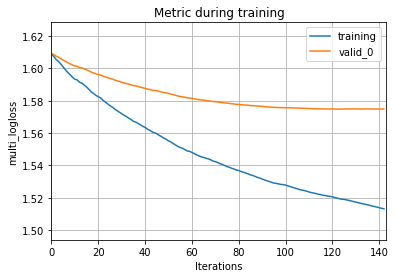

In [13]:
params = {"objective":"multiclass", 
          "num_boost_round":300, 
          "metric": ["multi_logloss"], # 'None'
          "num_classes":5,
          "first_metric_only": True,
          "feature_pre_filter": True,
          "learning_rate":0.01,
          "num_leaves":16,
          "bagging_fraction": 0.8,
          "feature_fraction": 0.8,
          "force_row_wise":True}

def RPS_metric(preds, eval_data):
    true = eval_data.get_label()
    preds = preds.T.reshape((5, -1)).T
    value =  np.mean((pd.get_dummies(true).cumsum(axis = 1) - np.cumsum(preds.reshape((-1, 5)), axis = 1)) ** 2, axis = 1).mean()
    return "RPS", value, False

res_dict = {}
booster = lgb.train(params, 
                    lgb_data, 
                   valid_sets= (val_data, lgb_data),
                   # feval = RPS_metric,
                   callbacks=[lgb.record_evaluation(res_dict), 
                              lgb.early_stopping(20)])

lgb.plot_metric(res_dict)

In [15]:
res += [{"train": diagnosis(y_train, booster.predict(X_train)), 
  "val":diagnosis(y_val, booster.predict(X_val))}]

pd.DataFrame(res)

,train,val
0,0.160797,0.160023
1,0.158569,0.159800
2,0.152917,0.160764
3,0.152917,0.160764


In [23]:
pred_train = booster.predict(X_train)

,,0,1,2,3,4
variable,Date,,,,,
DG,2010-01-20,0,1,1,1,1
PRU,2010-01-20,0,1,1,1,1
EWH,2010-01-20,0,0,0,1,1
XLE,2010-01-20,0,0,1,1,1
IEF,2010-01-20,0,0,0,1,1
...,...,...,...,...,...,...
V,2021-10-13,1,1,1,1,1
XLP,2021-10-13,0,0,1,1,1
EWJ,2021-10-13,0,1,1,1,1


<AxesSubplot:xlabel='variable'>

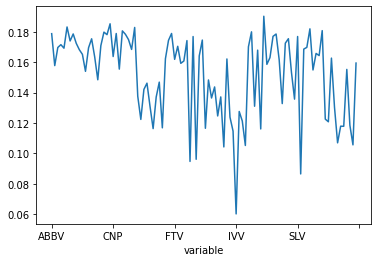

In [34]:
(np.mean((pd.get_dummies(y_train).cumsum(axis = 1).reset_index().set_index(['variable','Date']) - np.cumsum(pred_train, axis = 1)) ** 2, axis = 1)
 .groupby('variable').mean()).plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

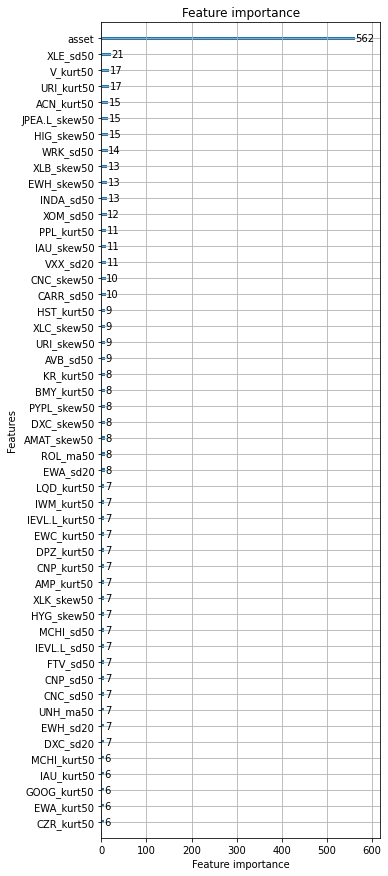

In [9]:
fig, ax = plt.subplots(figsize=(5, 15))
lgb.plot_importance(booster, ax = ax, max_num_features=50)

# Submission

In [10]:
final = pd.DataFrame()
for x in assets['symbol'].values:
    temp = X.iloc[-1:].copy()
    temp['variable'] = x
    final = pd.concat([final, temp])

In [11]:
final['variable'] = final['variable'].astype("category")

In [12]:
weights_df

NameError: name 'weights_df' is not defined

In [ ]:
submission = pd.DataFrame(booster.predict(final), index = final['variable']).reset_index()
# submission = pd.merge(submission, weights_df.iloc[-1:].T, right_index=True, left_on='variable')
# submission.columns = ['ID'] + [f'Rank{i}' for i in range(1, 6)] + ['Decision']
# submission.iloc[:, 1:] = submission.iloc[:, 1:].astype(np.float32)
# submission['Decision'] = submission['Decision'].clip(-1.0, 1.0)
# from numpy.random import default_rng
# submission.iloc[:, 1:] = np.around(submission.iloc[:, 1:], 5)
# err = submission.iloc[:, 1:6].sum(axis = 1) - 1
# rng = default_rng(42)
# col = rng.choice(5, 100)
# for i in range(100):
#     submission.iloc[i, 1 + col[i]] -= err.iloc[i]

# col = rng.choice(submission.loc[submission['Decision'] > 0].index)    
# err = submission.iloc[:, 6].sum() - 1
# submission.iloc[col, 6] -= round(err, 5)
# submission.to_csv("submissin.csv", index=False, float_format = "%.5f")

submission

# Portfolio

$(20 \times 100) \times (100 \times 1)$

In [ ]:
df2 = df.iloc[-3000:][['Adj Close']].reset_index().fillna(method='ffill')
temp = df2.groupby(df2.index // 20).nth(0)
df2 = np.log(df2.groupby(df2.index // 20).nth(-1).iloc[:, 1:] / temp.iloc[:, 1:]).set_index(temp.iloc[:, 0])
# No ties in dataset
# (df2.apply(lambda x: len(np.unique(x[~np.isnan(x)])), axis = 1) == (~df2.isnull()).sum(axis = 1)).sum()

df2.index.name = "Date"
df2.columns = list(df2.columns.levels[1][:-1])

df2

In [ ]:
from tqdm import tqdm
quantiles = df2.apply(lambda x: pd.qcut(x, [0, .2, .4, .6, .8, 1.], labels=False), axis = 1)
df3 = pd.DataFrame()
for i in tqdm(range(100)):
    temp = quantiles.iloc[:, [i]].rename({quantiles.columns[i]:"next_rank"}, axis = 1).shift(-1)
    temp['asset'] = quantiles.columns[i]
    temp['next_ret'] = df2.iloc[:, i].shift(-1)
    temp = pd.concat([df2, temp], axis = 1)
    df3 = pd.concat([df3, temp])
df3

In [ ]:
# df3.loc[df3['next_rank'] == -1, 'next_rank'] = np.nan
oos = df3.loc[df3['next_rank'].isnull()].groupby('asset').last().copy().reset_index()

df3 = df3.loc[~df3['next_rank'].isnull()]
df3.loc[:, 'next_rank'] = df3.loc[:, 'next_rank'].astype(int)
df3.loc[:, 'asset'] = df3.loc[:, 'asset'].astype("category")
oos = oos.reset_index()
oos = oos.loc[:, df3.columns]
oos['asset'] = oos['asset'].astype('category')

In [ ]:
df3 = (df3.
 reset_index().
 sort_values(by = 'Date').
 reset_index(drop = True).
 set_index('Date'))

In [ ]:
_, groups = np.unique(df3.index, return_counts=True)

In [ ]:
import lightgbm as lgb

**ranker**

In [ ]:
lgbr = lgb.LGBMRanker(n_estimators=100,objective="lambdarank",metric="ndcg")
lgbr.fit(df3.drop(['next_rank', 'next_ret'], axis = 1), 
         df3['next_rank'], group = groups)

In [ ]:
preds = lgbr.predict(df3.drop(['next_rank', 'next_ret'], axis = 1))
df4 = df3.copy()
df4['preds'] = preds
pred_ranks = pd.pivot_table(df4[['preds','asset']], values='preds', columns = 'asset', index = df3.index)
pred_ranks

## Metrics

Normalised Cumulative Discounted Gain: A perfect score procues a ranking of 1

In [ ]:
from sklearn.metrics import ndcg_score
ndcg_scores = np.zeros(149)

for i in range(149):
    ndcg_scores[i] = ndcg_score(quantiles.shift(-1).iloc[[i]].T.dropna().T.values, pred_ranks.iloc[[i]].T.dropna().T.values)
import matplotlib.pyplot as plt
plt.plot(ndcg_scores)

# Portfolio

Map Predictions (Ranks, Probabilities) to weights via some function


$$f(\hat{y}_{t}) \rightarrow w_{t}$$

Maximise the *information ratio* of our portfolio

$$E[R_{p, t}] / SD(R_{p, t}), R_{p, t} = w_{t} \cdot R_{t}$$

https://github.com/microprediction/precise

Partial Moments

+ https://arxiv.org/pdf/2112.15499.pdf

In [ ]:
from scipy.special import softmax
weights = pred_ranks.fillna(-99999).apply(lambda x: softmax(x), axis = 1)
weights

In [ ]:
rets = (np.exp(df2.shift(-1).iloc[:-1]) - 1)

In [ ]:
rets = (weights * (np.exp(df2.shift(-1).iloc[:-1]) - 1)).sum(axis = 1)
display(rets)

In [ ]:
rets.cumsum().plot()

In [ ]:
weights = df2.copy()
weights[~weights.isna()] = 1
weights = weights.div(weights.count(axis = 1),axis = 0)
weights = weights.fillna(0)

In [ ]:
weights

# Test Cases

Probabilities rounded to 5dp have to sum to 1:

$|1 - Sum_{j = 1}^{5} P_{ij} | < 1e-5$

100 x 7 dataframe

Long format

(T x N) x F




In [144]:
action = pd.read_csv("submission.csv")

In [143]:
action = pd.read_csv("submission.csv")
temp =  pd.DataFrame(lgbr.predict(oos.drop(['next_rank', 'next_ret'], axis = 1)), index = oos['asset'], columns=['action'])
temp = temp.fillna(-99999).apply(lambda x: softmax(x), axis = 0)

NameError: name 'lgbr' is not defined

In [112]:
action = pd.merge(action, temp, left_on='ID', right_index=True)
action.to_csv("submission.csv", index=False)

In [ ]:
col_names = "ID", "Rank1", "Rank2", "Rank3", "Rank4", "Rank5", "Decision"
